In [234]:
import sys
assert sys.version_info >= (3,7)
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")
import matplotlib.pyplot as pit
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [235]:
pit.rc('font', size=12)
pit.rc('axes', labelsize=14, titlesize=14)
pit.rc('legend', fontsize=12)
pit.rc('xtick', labelsize=10)
pit.rc('ytick', labelsize=10)

In [236]:
np.random.seed(42)

In [237]:
datapath = "https://raw.githubusercontent.com/codingalzi/handson-ml3/master/notebooks/data/lifesat/"

In [238]:
oecd_country_stats = pd.read_csv('oecd_bli_2020.csv')
oecd_country_stats.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.4,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.5,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.7,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.0,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN


In [239]:
oecd_country_stats

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.40,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.50,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.70,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.00,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,LTU,Lithuania,WL_EWLH,Employees working very long hours,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,0.54,NaN,NaN
2365,COL,Colombia,WL_EWLH,Employees working very long hours,L,Value,MN,Men,PC,Percentage,0,Units,NaN,NaN,32.09,NaN,NaN
2366,LTU,Lithuania,WL_EWLH,Employees working very long hours,L,Value,MN,Men,PC,Percentage,0,Units,NaN,NaN,0.67,NaN,NaN
2367,COL,Colombia,WL_EWLH,Employees working very long hours,L,Value,WMN,Women,PC,Percentage,0,Units,NaN,NaN,19.37,NaN,NaN


In [240]:
import pandas as pd

# OECD 데이터 불러오기
oecd_country_stats = pd.read_csv('oecd_bli_2020.csv')

# 필요한 열 선택
selected_columns = ['LOCATION',	'Country',	'INDICATOR', 'Indicator','MEASURE','Value']
oecd_country_stats_selected = oecd_country_stats[selected_columns]

# 결과 확인
print(oecd_country_stats_selected.head().to_markdown(index=False, numalign="left", stralign="left"))
print(f"\nDataFrame shape: {oecd_country_stats_selected.shape}")

| LOCATION   | Country        | INDICATOR   | Indicator                | MEASURE   | Value   |
|:-----------|:---------------|:------------|:-------------------------|:----------|:--------|
| AUS        | Australia      | JE_LMIS     | Labour market insecurity | L         | 5.4     |
| AUT        | Austria        | JE_LMIS     | Labour market insecurity | L         | 3.5     |
| BEL        | Belgium        | JE_LMIS     | Labour market insecurity | L         | 3.7     |
| CAN        | Canada         | JE_LMIS     | Labour market insecurity | L         | 6       |
| CZE        | Czech Republic | JE_LMIS     | Labour market insecurity | L         | 3.1     |

DataFrame shape: (2369, 6)


In [241]:
import pandas as pd

# OECD 데이터 불러오기
oecd_country_stats = pd.read_csv('oecd_bli_2020.csv')

# 중복 행 제거
oecd_country_stats_unique = oecd_country_stats.drop_duplicates()

# 결과 확인
print(oecd_country_stats_unique.head().to_markdown(index=False, numalign="left", stralign="left"))
print(f"\nDataFrame shape: {oecd_country_stats_unique.shape}")

| LOCATION   | Country        | INDICATOR   | Indicator                | MEASURE   | Measure   | INEQUALITY   | Inequality   | Unit Code   | Unit       | PowerCode Code   | PowerCode   | Reference Period Code   | Reference Period   | Value   | Flag Codes   | Flags   |
|:-----------|:---------------|:------------|:-------------------------|:----------|:----------|:-------------|:-------------|:------------|:-----------|:-----------------|:------------|:------------------------|:-------------------|:--------|:-------------|:--------|
| AUS        | Australia      | JE_LMIS     | Labour market insecurity | L         | Value     | TOT          | Total        | PC          | Percentage | 0                | Units       | nan                     | nan                | 5.4     | nan          | nan     |
| AUT        | Austria        | JE_LMIS     | Labour market insecurity | L         | Value     | TOT          | Total        | PC          | Percentage | 0                | Units       | nan   

In [242]:
import pandas as pd

# OECD 데이터 불러오기
oecd_country_stats = pd.read_csv('oecd_bli_2020.csv')

# 데이터의 10%만 샘플링
oecd_country_stats_sampled = oecd_country_stats.sample(frac=0.1)

# 결과 확인
print(oecd_country_stats_sampled.head().to_markdown(index=False, numalign="left", stralign="left"))
print(f"\nDataFrame shape: {oecd_country_stats_sampled.shape}")


| LOCATION   | Country     | INDICATOR   | Indicator                                         | MEASURE   | Measure   | INEQUALITY   | Inequality   | Unit Code   | Unit          | PowerCode Code   | PowerCode   | Reference Period Code   | Reference Period   | Value   | Flag Codes   | Flags   |
|:-----------|:------------|:------------|:--------------------------------------------------|:----------|:----------|:-------------|:-------------|:------------|:--------------|:-----------------|:------------|:------------------------|:-------------------|:--------|:-------------|:--------|
| SVN        | Slovenia    | ES_STCS     | Student skills                                    | L         | Value     | MN           | Men          | AVSCORE     | Average score | 0                | Units       | nan                     | nan                | 502     | nan          | nan     |
| CHE        | Switzerland | CG_SENG     | Stakeholder engagement for developing regulations | L         | Value     |

In [243]:
import pandas as pd

oecd_country_stats = pd.read_csv('oecd_bli_2020.csv')

# 10% 샘플링
sampled_df = oecd_country_stats.sample(frac=0.1)
print(f"샘플링 후 행 수: {len(sampled_df)}")

# 500개 샘플 추출
sampled_df_n = oecd_country_stats.sample(n=500)
print(f"샘플링 후 행 수: {len(sampled_df_n)}")

샘플링 후 행 수: 237
샘플링 후 행 수: 500


In [245]:
from pathlib import Path

# Where to save the figures
IMAGES_PATH = Path() / "images" / "fundamentals"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        pit.tight_layout()
    pit.savefig(path, format=fig_extension, dpi=resolution)

In [246]:
import urllib.request

datapath = Path() / "datasets" / "lifesat"
datapath.mkdir(parents=True, exist_ok=True)

data_root = "https://github.com/ageron/data/raw/main/"
for filename in ("oecd_bli.csv", "gdp_per_capita.csv"):
    if not (datapath / filename).is_file():
        print("Downloading", filename)
        url = data_root + "lifesat/" + filename
        urllib.request.urlretrieve(url, datapath / filename)

In [247]:
oecd_bli = pd.read_csv(datapath / "oecd_bli.csv")
gdp_per_capita = pd.read_csv(datapath / "gdp_per_capita.csv")

In [248]:
gdp_year = 2020
gdppc_col = "GDP per capita (KOR)"
lifesat_col = "Life satisfaction"

gdp_per_capita = gdp_per_capita[gdp_per_capita["Year"] == gdp_year]
gdp_per_capita = gdp_per_capita.drop(["Code", "Year"], axis=1)
gdp_per_capita.columns = ["Country", gdppc_col]
gdp_per_capita.set_index("Country", inplace=True)

gdp_per_capita.head()

,GDP per capita (KOR)
Country,
Afghanistan,1978.961579
Africa Eastern and Southern,3387.594670
Africa Western and Central,4003.158913
Albania,13295.410885
Algeria,10681.679297


In [249]:
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

oecd_bli.head()

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3


In [250]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                              left_index=True, right_index=True)
full_country_stats.sort_values(by=gdppc_col, inplace=True)
full_country_stats = full_country_stats[[gdppc_col, lifesat_col]]

full_country_stats.head()

,GDP per capita (KOR),Life satisfaction
Country,,
South Africa,11466.189672,4.7
Colombia,13441.492952,6.3
Brazil,14063.982505,6.4
Mexico,17887.750736,6.5
Chile,23324.524751,6.5


In [251]:
min_gdp = 23_500
max_gdp = 62_500

country_stats = full_country_stats[(full_country_stats[gdppc_col] >= min_gdp) &
                                   (full_country_stats[gdppc_col] <= max_gdp)]
country_stats.head()

,GDP per capita (KOR),Life satisfaction
Country,,
Russia,26456.387938,5.8
Greece,27287.083401,5.4
Turkey,28384.987785,5.5
Latvia,29932.493910,5.9
Hungary,31007.768407,5.6


In [252]:
country_stats.to_csv(datapath / "lifesat.csv")
full_country_stats.to_csv(datapath / "lifesat_full.csv")

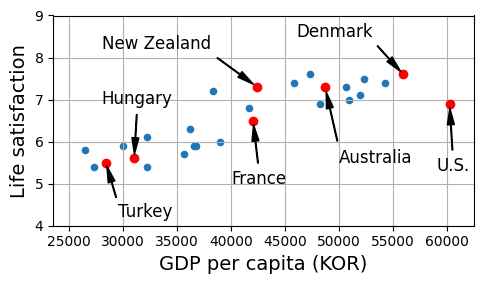

In [253]:
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

min_life_sat = 4
max_life_sat = 9

position_text = {
    "Turkey": (29_500, 4.2),
    "Hungary": (28_000, 6.9),
    "France": (40_000, 5),
    "New Zealand": (28_000, 8.2),
    "Australia": (50_000, 5.5),
    "United States": (59_000, 5.3),
    "Denmark": (46_000, 8.5)
}

for country, pos_text in position_text.items():
    pos_data_x = country_stats[gdppc_col].loc[country]
    pos_data_y = country_stats[lifesat_col].loc[country]
    country = "U.S." if country == "United States" else country
    pit.annotate(country, xy=(pos_data_x, pos_data_y),
                 xytext=pos_text, fontsize=12,
                 arrowprops=dict(facecolor='black', width=0.5,
                                 shrink=0.08, headwidth=5))
    pit.plot(pos_data_x, pos_data_y, "ro")

pit.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

save_fig('money_happy_scatterplot')
pit.show()

In [254]:
country_stats.loc[list(position_text.keys())]

,GDP per capita (KOR),Life satisfaction
Country,,
Turkey,28384.987785,5.5
Hungary,31007.768407,5.6
France,42025.617373,6.5
New Zealand,42404.393738,7.3
Australia,48697.837028,7.3
United States,60235.728492,6.9
Denmark,55938.212809,7.6


In [255]:
from sklearn.linear_model import LinearRegression

lin1 = LinearRegression()

In [256]:
highlighted_countries = country_stats.loc[list(position_text.keys())]
highlighted_countries[[gdppc_col, lifesat_col]].sort_values(by=gdppc_col)

,GDP per capita (KOR),Life satisfaction
Country,,
Turkey,28384.987785,5.5
Hungary,31007.768407,5.6
France,42025.617373,6.5
New Zealand,42404.393738,7.3
Australia,48697.837028,7.3
Denmark,55938.212809,7.6
United States,60235.728492,6.9


In [257]:
missing_data = oecd_country_stats.iloc[omitted_indices]

missing_data

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.4,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.5,NaN,NaN
6,FIN,Finland,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.9,NaN,NaN
8,DEU,Germany,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.7,NaN,NaN
33,OECD,OECD - Total,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,7.0,NaN,NaN
34,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,MN,Men,PC,Percentage,0,Units,NaN,NaN,5.9,NaN,NaN
35,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,MN,Men,PC,Percentage,0,Units,NaN,NaN,4.2,NaN,NaN


In [258]:
country_stats.loc[list(position_text.keys())]

,GDP per capita (KOR),Life satisfaction
Country,,
Turkey,28384.987785,5.5
Hungary,31007.768407,5.6
France,42025.617373,6.5
New Zealand,42404.393738,7.3
Australia,48697.837028,7.3
United States,60235.728492,6.9
Denmark,55938.212809,7.6


In [259]:
from sklearn.linear_model import LinearRegression

lin1 = LinearRegression()